In [1]:
import os
%load_ext rpy2.ipython


In [2]:
%%R
workDir = '/home/chantal/Chazy/data/'
figDir = '/home/chantal/Chazy/Bulk/ITS/data/figs/'

physeqDir = '/home/chantal/Chazy/data/phyloseq/ITS/'
physeqBulk = 'bulk-core'


nprocs = 20

In [3]:
%%R
library(ggplot2)
library(phyloseq)
library(tidyr)
library(plyr);library(dplyr)
library(scales)
library(biom)
library(metagenomeSeq)
library(doParallel)


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/f

In [4]:
%%R
F = file.path(physeqDir, physeqBulk)
physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
#physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk.m = physeq.Bulk %>% sample_data

physeq.Bulk.core = prune_samples(physeq.Bulk.m$Land_Management != "PAS", physeq.Bulk)

physeq.Bulk.core = physeq.Bulk.core %>% filter_taxa(function(x) sum(x) > 0, TRUE)

physeq.Bulk.m = physeq.Bulk.core %>% sample_data
    

#print(physeq.Bulk.Sparsity)
print(physeq.Bulk.core)


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2232 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 2232 taxa by 7 taxonomic ranks ]


In [5]:
%%R
physeq.Bulk.m = physeq.Bulk %>% sample_data

In [6]:
%%R
physeq.Bulk.m$Sample_Date = as.POSIXct(strptime(physeq.Bulk.m$Sample_Date, format = "%m/%d/%y"))
str(physeq.Bulk.m$Sample_Date)

 POSIXct[1:185], format: "2015-04-30" "2015-08-13" "2015-04-30" "2015-07-16" ...


In [7]:
%%R
physeq.Bulk.m$Day = round(difftime(physeq.Bulk.m$Sample_Date, min(physeq.Bulk.m$Sample_Date), 
         units = "days"))
tail(physeq.Bulk.m)

Sample Data:        [6 samples by 24 sample variables]:
                    Full.sample Fraction PrimerF PrimerR Barcode Rev.index
Sept.NTR.2.2015 Sept.NTR.2.2015       NA  nBITSf   58A2r     144  gtaacgag
Aug.PTH.2.2015   Aug.PTH.2.2015       NA  nBITSf   58A2r     122  tctctatg
Aug.PAS.2015       Aug.PAS.2015       NA  nBITSf   58A2r     134  gatctacg
Sept.NTH.1.2015 Sept.NTH.1.2015       NA  nBITSf   58A2r     136  gatctacg
Aug.NTR.4.2015   Aug.NTR.4.2015       NA  nBITSf   58A2r     133  gatctacg
Sept.NTH.2.2015 Sept.NTH.2.2015       NA  nBITSf   58A2r     142  gtaacgag
                Fwd.index Treatment      Day Pool     Experiment Gradient
Sept.NTR.2.2015  gacaccgt       NTR 440 days    5 Chazy.ITS.Bulk     <NA>
Aug.PTH.2.2015   actatctg       PTH 399 days    5 Chazy.ITS.Bulk     <NA>
Aug.PAS.2015     cgtgagtg       PAS 399 days    5 Chazy.ITS.Bulk     <NA>
Sept.NTH.1.2015  gacaccgt       NTH 440 days    5 Chazy.ITS.Bulk     <NA>
Aug.NTR.4.2015   tcatcgag       NTR 399 days    5

In [8]:
%%R
physeq.Bulk.m$Day_rel = as.numeric(physeq.Bulk.m$Day)


In [9]:
%%R
head(physeq.Bulk.m)


Sample Data:        [6 samples by 25 sample variables]:
                  Full.sample Fraction PrimerF PrimerR Barcode Rev.index
April.NTR.4       April.NTR.4       NA  nBITSf   58A2r     155  atagtacc
Aug.NTR.3.2015 Aug.NTR.3.2015       NA  nBITSf   58A2r     129  gatctacg
April.PTR.3       April.PTR.3       NA  nBITSf   58A2r     150  acgtgcgc
July15.NTH.3     July15.NTH.3       NA  nBITSf   58A2r     184  aacgctga
Nov.NTR.1           Nov.NTR.1       NA  nBITSf   58A2r     125  tctctatg
June.NTH.2         June.NTH.2       NA  nBITSf   58A2r     162  gcgtatac
               Fwd.index Treatment      Day Pool     Experiment Gradient
April.NTR.4     tagcgagt       NTR 294 days    4 Chazy.ITS.Bulk     <NA>
Aug.NTR.3.2015  atcgtacg       NTR 399 days    5 Chazy.ITS.Bulk     <NA>
April.PTR.3     cgtgagtg       PTR 294 days    4 Chazy.ITS.Bulk     <NA>
July15.NTH.3    gacaccgt       NTH 371 days    4 Chazy.ITS.Bulk     <NA>
Nov.NTR.1       tcatcgag       NTR 139 days    4 Chazy.ITS.Bulk     

In [10]:
%%R
physeq.final = merge_phyloseq(physeq.Bulk.core, physeq.Bulk.m)
physeq.final

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2232 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 25 sample variables ]
tax_table()   Taxonomy Table:    [ 2232 taxa by 7 taxonomic ranks ]


In [11]:
%%R
physeq.final

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2232 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 25 sample variables ]
tax_table()   Taxonomy Table:    [ 2232 taxa by 7 taxonomic ranks ]


In [12]:
%%R
make_metagenomeSeq = function(physeq) {
    require("metagenomeSeq")
    require("phyloseq")
    # Enforce orientation
    if (!taxa_are_rows(physeq)) {
        physeq <- t(physeq)
    }
    OTU = as(otu_table(physeq), "matrix")
    #OTUTill = subset(OTU, rownames(OTU) %in% df.Till.r$OTU)

    # Convert sample_data to AnnotatedDataFrame
    ADF = AnnotatedDataFrame(data.frame(sample_data(physeq)))
    # define dummy 'feature' data for OTUs, using their name Helps with
    # extraction and relating to taxonomy later on.
    TDF = AnnotatedDataFrame(data.frame(tax_table(physeq)))
    #TDFTill = subset(TDF, rownames(TDF) %in% df.Till.r$OTU)
    TDF$Rank9 = rownames(TDF)


    # Create the metagenomeSeq object
    MGS = newMRexperiment(counts = OTU, phenoData = ADF, featureData = TDF)
    # Trigger metagenomeSeq to calculate its Cumulative Sum scaling factor.
    MGS = cumNorm(MGS)
    return(MGS)
}

MR = make_metagenomeSeq(physeq.final)

In [13]:
%%R
str(MR)

Formal class 'MRexperiment' [package "metagenomeSeq"] with 8 slots
  ..@ expSummary       :<environment: 0xf1a57a8> 
  ..@ assayData        :<environment: 0xf013a78> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  .. .. ..@ varMetadata      :'data.frame':	25 obs. of  1 variable:
  .. .. .. ..$ labelDescription: chr [1:25] NA NA NA NA ...
  .. .. ..@ data             :'data.frame':	176 obs. of  25 variables:
  .. .. .. ..$ Full.sample       : Factor w/ 176 levels "April.NTH.1.2015",..: 8 17 14 35 73 50 2 3 129 63 ...
  .. .. .. ..$ Fraction          : int [1:176] NA NA NA NA NA NA NA NA NA NA ...
  .. .. .. ..$ PrimerF           : Factor w/ 1 level "nBITSf": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. ..$ PrimerR           : Factor w/ 1 level "58A2r": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. ..$ Barcode           : int [1:176] 155 129 150 184 125 162 145 149 99 168 ...
  .. .. .. ..$ Rev.index         : Factor w/ 16 levels "aacgctga","acgtgcgc",..: 4 8 2 1

In [14]:
%%R
TimeSeries = function(MR, feature) {  
    
    res = fitTimeSeries(obj = MR, lvl = 'Rank9', feature = feature, class = "OM",
                    id = "Full.sample", time = "Day_rel", log = TRUE)

    return(res)
}




In [15]:
%%R
OTU = as(otu_table(physeq.final), "matrix")

feature = rownames(OTU)
str(feature)

 chr [1:2232] "OTU.71996" "OTU.20472" "OTU.7528" "OTU.14609" ...


In [16]:
%%R 
mdf = psmelt(physeq.final)

In [ ]:
%%R
test = mdf %>% group_by(OTU) %>% summarise(sum = sum(Abundance))
range(test$sum)

[1]     1 69414


In [ ]:
%%R
#OTUs not found across all timepoints?
registerDoParallel(10)

TS = llply(feature, 
          TimeSeries, 
          .parallel = TRUE,
          MR = MR 
         )

In [19]:
%%R
str(TS)

List of 2232
 $ :List of 5
  ..$ timeIntervals: chr "No statistically significant time intervals detected"
  ..$ data         :'data.frame':	176 obs. of  4 variables:
  .. ..$ abundance: num [1:176] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ class    : Factor w/ 2 levels "H","R": 2 2 2 1 2 1 1 1 1 2 ...
  .. ..$ time     : num [1:176] 294 399 294 371 139 342 294 294 76 342 ...
  .. ..$ id       : Factor w/ 176 levels "April.NTH.1.2015",..: 8 17 14 35 73 50 2 3 129 63 ...
  ..$ fit          :'data.frame':	504 obs. of  3 variables:
  .. ..$ fit       : num [1:504] 0.0481 0.0481 0.0481 0.0481 0.0481 ...
  .. ..$ se        : num [1:504] 0.0695 0.0693 0.0692 0.069 0.0688 ...
  .. ..$ timePoints: num [1:504] 0 1 2 3 4 5 6 7 8 9 ...
  ..$ perm         : NULL
  ..$ call         : language fitTimeSeries(obj = MR, feature = feature, class = "OM", time = "Day_rel",      id = "Full.sample", lvl = "Rank9", log = TRUE)
 $ :List of 5
  ..$ timeIntervals: chr "No statistically significant time intervals detecte

In [20]:
%%R
names(TS) = feature

In [21]:
%%R
timeSeriesFits = sapply(TS,function(i){i[[1]]})[-grep("No",TS)]

In [23]:
%%R
head(timeSeriesFits[[2]])

     Interval start Interval end      Area p.value
[1,]            112          140 -3.622794   0.143


In [24]:
%%R
for(i in 1:length(timeSeriesFits)){
    rownames(timeSeriesFits[[i]]) =
    paste(
    paste(names(timeSeriesFits)[i]," interval",sep=""),
    1:nrow(timeSeriesFits[[i]]),sep=":"
)
}

In [25]:
%%R
timeSeriesFits = as.data.frame(do.call(rbind, timeSeriesFits))


#do.call(rbind,timeSeriesFits)

In [26]:
%%R
pvalues = timeSeriesFits[,"p.value"]
adjPvalues = p.adjust(pvalues,"bonferroni")
timeSeriesFits = cbind(timeSeriesFits,adjPvalues)
head(timeSeriesFits)

                     Interval start Interval end       Area p.value adjPvalues
OTU.7528 interval:1               0          150 -72.010310   0.037          1
OTU.28807 interval:1            112          140  -3.622794   0.143          1
OTU.2605 interval:1              22          491 312.924773   0.007          1
OTU.13482 interval:1            261          503 -52.658778   0.011          1
OTU.6041 interval:1             255          503 -59.961792   0.020          1
OTU.2703 interval:1             287          450 -97.633721   0.030          1


In [27]:
%%R
write.csv(timeSeriesFits, 'data/timeSeries_OM_ITS.csv')

In [28]:
%%R
TSOM = read.csv('data/timeSeries_OM_ITS.csv')

In [29]:
%%R
TS.sig = filter(TSOM, adjPvalues <= 0.01)

In [30]:
%%R
TS.sig$OTU_interval = TS.sig$X
TS.sig = separate(TS.sig, OTU_interval, c('OTU', 'interval'), sep = " ") %>% separate(interval, c('interval', 'num'))
head(TS.sig)

                     X Interval.start Interval.end       Area p.value
1  OTU.2440 interval:1            195          503  -298.9001       0
2  OTU.1259 interval:1            158          503   299.7036       0
3  OTU.2583 interval:1            189          503  -299.8536       0
4  OTU.1434 interval:1             28          120   135.5618       0
5 OTU.10667 interval:1            186          503   113.4344       0
6    OTU.11 interval:1             23          503 -1166.8650       0
  adjPvalues       OTU interval num
1          0  OTU.2440 interval   1
2          0  OTU.1259 interval   1
3          0  OTU.2583 interval   1
4          0  OTU.1434 interval   1
5          0 OTU.10667 interval   1
6          0    OTU.11 interval   1


In [31]:
%%R
print(length(unique(TS.sig$OTU))) 
Mult_resp = TS.sig %>% group_by(OTU) %>% summarise(respTime = n()) %>% filter(respTime > 1)

[1] 67


In [32]:
%%R
Make_DF = function(TS) {  
    
    d = data.frame(TS$data[, c("abundance","class", "time", "id")])
    d$Sample = rownames(TS$data)


    return(d)
}

In [33]:
%%R
l = list()
for (i in 1:length(feature)) {
    classname = as.vector(feature[i])
    l[[classname]] = Make_DF(TS[[i]])
    
}

In [34]:
%%R
DF = do.call(rbind, l)

In [35]:
%%R
write.csv(DF, 'data/TimeSeries_Abundance_OM_ITS.csv')

In [36]:
%%R
DF = read.csv('data/TimeSeries_Abundance_OM_ITS.csv')
head(DF)

                         X abundance class time             id         Sample
1    OTU.71996.April.NTR.4         0     R  294    April.NTR.4    April.NTR.4
2 OTU.71996.Aug.NTR.3.2015         0     R  399 Aug.NTR.3.2015 Aug.NTR.3.2015
3    OTU.71996.April.PTR.3         0     R  294    April.PTR.3    April.PTR.3
4   OTU.71996.July15.NTH.3         0     H  371   July15.NTH.3   July15.NTH.3
5      OTU.71996.Nov.NTR.1         0     R  139      Nov.NTR.1      Nov.NTR.1
6     OTU.71996.June.NTH.2         0     H  342     June.NTH.2     June.NTH.2


In [37]:
%%R
DF2 = tidyr::separate(DF, X, c('OTU', "num", "MY", "Treat", 'Rep'), sep = '\\.' )
DF2$C = paste(DF2$OTU, DF2$num, sep = '.')
DF2$Full.sample = paste(DF2$MY, DF2$Treat, DF2$Rep, sep = '.')
DF2 = filter(DF2, C %in% TS.sig$OTU)
head(DF2)

  OTU  num     MY Treat Rep abundance class time             id         Sample
1 OTU 2440  April   NTR   4  0.000000     R  294    April.NTR.4    April.NTR.4
2 OTU 2440    Aug   NTR   3  0.000000     R  399 Aug.NTR.3.2015 Aug.NTR.3.2015
3 OTU 2440  April   PTR   3  4.779816     R  294    April.PTR.3    April.PTR.3
4 OTU 2440 July15   NTH   3  3.430279     H  371   July15.NTH.3   July15.NTH.3
5 OTU 2440    Nov   NTR   1  2.465945     R  139      Nov.NTR.1      Nov.NTR.1
6 OTU 2440   June   NTH   2  0.000000     H  342     June.NTH.2     June.NTH.2
         C  Full.sample
1 OTU.2440  April.NTR.4
2 OTU.2440    Aug.NTR.3
3 OTU.2440  April.PTR.3
4 OTU.2440 July15.NTH.3
5 OTU.2440    Nov.NTR.1
6 OTU.2440   June.NTH.2


In [38]:
%%R
head(DF2)
DF.sum = DF2 %>% group_by(C, time, class) %>% summarise(meanab = mean(abundance), sdab = sd(abundance))

In [39]:
%%R
head(DF.sum)

Source: local data frame [6 x 5]
Groups: C, time [3]

         C  time  class    meanab      sdab
     (chr) (int) (fctr)     (dbl)     (dbl)
1 OTU.1022     0      H 1.1335013 3.2060259
2 OTU.1022     0      R 0.3042964 0.8606801
3 OTU.1022    76      H 0.0000000 0.0000000
4 OTU.1022    76      R 0.0000000 0.0000000
5 OTU.1022   111      H 0.0000000 0.0000000
6 OTU.1022   111      R 1.2368097 1.7776599


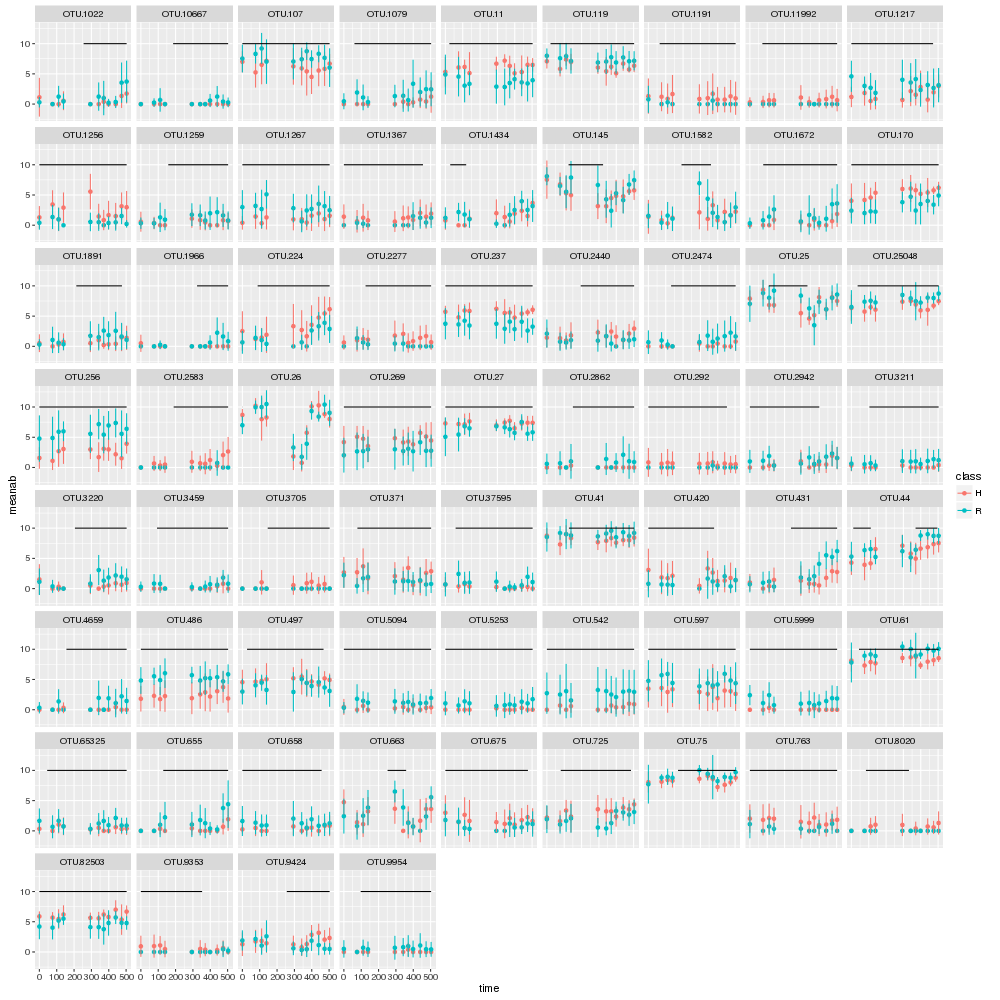

In [40]:
%%R -h 1000 -w 1000
TS.sig$C = TS.sig$OTU

limits = aes(ymax = meanab + sdab, ymin=meanab -sdab, color = class)


ggplot(DF.sum, aes(x = time, y = meanab)) + 
geom_point(aes(color = class)) + 
geom_errorbar(limits, width=0.25)+
geom_segment(data = TS.sig, aes(x = Interval.start, xend = Interval.end, y = 10, yend = 10)) +
facet_wrap(~C)

In [42]:
%%R
(TS.sig) %>% arrange(-Area) %>% head

                    X Interval.start Interval.end      Area p.value adjPvalues
1  OTU.256 interval:1              0          503 1771.1364       0          0
2  OTU.486 interval:1              0          503 1492.2396       0          0
3  OTU.542 interval:1              0          503 1154.3033       0          0
4 OTU.1267 interval:1              0          503  957.3809       0          0
5  OTU.597 interval:1              0          503  865.1923       0          0
6  OTU.107 interval:1              0          503  848.9599       0          0
       OTU interval num        C
1  OTU.256 interval   1  OTU.256
2  OTU.486 interval   1  OTU.486
3  OTU.542 interval   1  OTU.542
4 OTU.1267 interval   1 OTU.1267
5  OTU.597 interval   1  OTU.597
6  OTU.107 interval   1  OTU.107


In [43]:
%%R -w 1200 -h 500

Mult_TS$ISIE = factor(Mult_TS$ISIE, levels = Mult_TS$ISIE[order(-Mult_TS_sum$counts)])


ggplot(Mult_TS, aes(x = ISIE)) + geom_bar(aes(fill = as.factor(TS_num))) + #+ facet_wrap(~TS_num)+
        theme(text = element_text(size=18),
        axis.title.y = element_text(vjust=1),
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))  + xlab('Time Period')+
        ylab('Number of OTUs') 


The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.

Error in factor(Mult_TS$ISIE, levels = Mult_TS$ISIE[order(-Mult_TS_sum$counts)]) : 
  object 'Mult_TS' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in factor(Mult_TS$ISIE, levels = Mult_TS$ISIE[order(-Mult_TS_sum$counts)]) : 
  object 'Mult_TS' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [44]:
%%R
head(TS.sig)
TS.sig$Start[TS.sig$Interval.start %in% c(0:75)] = 'July2014'
#TS.sig$Start[TS.sig$Interval.start > 0 & TS.sig$Interval.start <76] = 'JunetoSept_2014'
TS.sig$Start[TS.sig$Interval.start %in% c(76:110)] = 'September2014'
#TS.sig$Start[TS.sig$Interval.start > 76 & TS.sig$Interval.start < 111 ] = 'SepttoOct_2014'
TS.sig$Start[TS.sig$Interval.start %in% c(111:138)] = 'October2014'
#TS.sig$Start[TS.sig$Interval.start > 111 & TS.sig$Interval.start < 139 ] = 'Oct_Nov_2014'
TS.sig$Start[TS.sig$Interval.start == 139] = 'November2014'
TS.sig$Start[TS.sig$Interval.start > 139 & TS.sig$Interval.start < 294] = 'Nov2014April2015'
TS.sig$Start[TS.sig$Interval.start %in% c(294:341)] = 'April2015'
#TS.sig$Start[TS.sig$Interval.start > 294 & TS.sig$Interval.start < 342] = 'April_June_2015'
TS.sig$Start[TS.sig$Interval.start %in% c(342: 370)] = 'June2015'
#TS.sig$Start[TS.sig$Interval.start > 342 & TS.sig$Interval.start < 371] = 'June_July_2015'
TS.sig$Start[TS.sig$Interval.start %in% c(371: 398)] = 'July2015'
#TS.sig$Start[TS.sig$Interval.start > 371 & TS.sig$Interval.start < 399] = 'July_Aug_2015'
TS.sig$Start[TS.sig$Interval.start %in% c(399: 439)] = 'August2015'
#TS.sig$Start[TS.sig$Interval.start > 399 & TS.sig$Interval.start < 440] = 'Aug_Sept_2015'
TS.sig$Start[TS.sig$Interval.start %in% c(440: 473)] = 'Sept2015'
#TS.sig$Start[TS.sig$Interval.start > 440 & TS.sig$Interval.start < 474] = 'Sept_Oct_2015'
TS.sig$Start[TS.sig$Interval.start %in% c(474: 502)] = 'Oct2015'
#TS.sig$Start[TS.sig$Interval.start > 474 & TS.sig$Interval.start < 503] = 'Oct_Nov_2015'
TS.sig$Start[TS.sig$Interval.start == 503] = 'Nov2015'


TS.sig$End[TS.sig$Interval.end %in% c(0:75)] = 'July2014'
#TS.sig$End[TS.sig$Interval.end > 0 & TS.sig$Interval.end <76] = 'JunetoSept_2014'
TS.sig$End[TS.sig$Interval.end %in% c(76:110)] = 'September2014'
#TS.sig$End[TS.sig$Interval.end > 76 & TS.sig$Interval.end < 111 ] = 'SepttoOct_2014'
TS.sig$End[TS.sig$Interval.end %in% c(111:138)] = 'October2014'
#TS.sig$End[TS.sig$Interval.end > 111 & TS.sig$Interval.end < 139 ] = 'Oct_Nov_2014'
TS.sig$End[TS.sig$Interval.end == 139] = 'November2014'
TS.sig$End[TS.sig$Interval.end > 139 & TS.sig$Interval.end < 294] = 'Nov2014_April2015'
TS.sig$End[TS.sig$Interval.end %in% c(294:341)] = 'April2015'
#TS.sig$End[TS.sig$Interval.end > 294 & TS.sig$Interval.end < 342] = 'April_June_2015'
TS.sig$End[TS.sig$Interval.end %in% c(342: 370)] = 'June2015'
#TS.sig$End[TS.sig$Interval.end > 342 & TS.sig$Interval.end < 371] = 'June_July_2015'
TS.sig$End[TS.sig$Interval.end %in% c(371: 398)] = 'July2015'
#TS.sig$Start[TS.sig$Interval.end > 371 & TS.sig$Interval.end < 399] = 'July_Aug_2015'
TS.sig$End[TS.sig$Interval.end %in% c(399: 439)] = 'August2015'
#TS.sig$End[TS.sig$Interval.end > 399 & TS.sig$Interval.end < 440] = 'Aug_Sept_2015'
TS.sig$End[TS.sig$Interval.end %in% c(440: 473)] = 'Sept2015'
#TS.sig$End[TS.sig$Interval.end > 440 & TS.sig$Interval.end < 474] = 'Sept_Oct_2015'
TS.sig$End[TS.sig$Interval.end %in% c(474: 502)] = 'Oct2015'
#TS.sig$End[TS.sig$Interval.end > 474 & TS.sig$Interval.end < 503] = 'Oct_Nov_2015'
TS.sig$End[TS.sig$Interval.end == 503] = 'Nov2015'





In [45]:
%%R
Mult_TS = TS.sig %>% group_by(OTU) %>% mutate(TS_num = n()) %>% mutate(diff = Interval.end-Interval.start)

head(Mult_TS) %>% as.data.frame

                     X Interval.start Interval.end       Area p.value
1  OTU.2440 interval:1            195          503  -298.9001       0
2  OTU.1259 interval:1            158          503   299.7036       0
3  OTU.2583 interval:1            189          503  -299.8536       0
4  OTU.1434 interval:1             28          120   135.5618       0
5 OTU.10667 interval:1            186          503   113.4344       0
6    OTU.11 interval:1             23          503 -1166.8650       0
  adjPvalues       OTU interval num         C            Start         End
1          0  OTU.2440 interval   1  OTU.2440 Nov2014April2015     Nov2015
2          0  OTU.1259 interval   1  OTU.1259 Nov2014April2015     Nov2015
3          0  OTU.2583 interval   1  OTU.2583 Nov2014April2015     Nov2015
4          0  OTU.1434 interval   1  OTU.1434         July2014 October2014
5          0 OTU.10667 interval   1 OTU.10667 Nov2014April2015     Nov2015
6          0    OTU.11 interval   1    OTU.11         July20

In [46]:
%%R
Mult_TS$ISIE = paste(Mult_TS$Start, Mult_TS$End, sep = '-')

In [47]:
%%R
Mult_TS_sum = Mult_TS %>% group_by(ISIE) %>% summarise(counts = n(), max_diff = max(diff), min_diff = min(diff))

In [48]:
%%R
Mult_TS$type = ifelse(Mult_TS$diff > 392, 'Long Term',
                      ifelse(Mult_TS$diff %in% c(210: 392), 'Extended',
                            ifelse(Mult_TS$diff %in% c(103: 209), 'Interannual',
                                ifelse(Mult_TS$diff %in% c(30:102), 'Seasonal','Short term'))))

In [49]:
%%R
Mult_TS %>% group_by(type) %>% filter(Area > 0) %>% summarize(nR = n()) %>% print()
Mult_TS %>% group_by(type) %>% filter(Area < 0) %>% summarize(nH = n()) %>% print

Source: local data frame [4 x 2]

         type    nR
        (chr) (int)
1    Extended    13
2 Interannual     5
3   Long Term    22
4    Seasonal     2
Source: local data frame [3 x 2]

        type    nH
       (chr) (int)
1   Extended     8
2  Long Term    17
3 Short term     1


In [50]:
%%R
tax = as.data.frame(tax_table(physeq.final))
tax$OTU = rownames(tax)
head(tax)

                Rank1         Rank2              Rank3           Rank4
OTU.71996    k__Fungi p__Ascomycota c__Dothideomycetes o__Pleosporales
OTU.20472 k__Protista   p__Cercozoa    c__unidentified o__unidentified
OTU.7528  k__Protista   p__Cercozoa    c__unidentified o__unidentified
OTU.14609 k__Protista   p__Cercozoa    c__unidentified o__unidentified
OTU.20112 k__Protista   p__Cercozoa    c__unidentified o__unidentified
OTU.28807 k__Protista   p__Cercozoa    c__unidentified o__unidentified
                    Rank5           Rank6          Rank7       OTU
OTU.71996            <NA>            <NA>           <NA> OTU.71996
OTU.20472 f__unidentified g__unidentified s__Cercozoa sp OTU.20472
OTU.7528  f__unidentified g__unidentified s__Cercozoa sp  OTU.7528
OTU.14609 f__unidentified g__unidentified s__Cercozoa sp OTU.14609
OTU.20112 f__unidentified g__unidentified s__Cercozoa sp OTU.20112
OTU.28807 f__unidentified g__unidentified s__Cercozoa sp OTU.28807


In [51]:
%%R
tax$Rank2 = gsub("__", "", tax$Rank2)
tax$Rank3 = gsub("__", "", tax$Rank3)
tax$Rank4 = gsub("__", "", tax$Rank4)
tax$Rank5 = gsub("__", "", tax$Rank5)
tax$Rank6 = gsub("__", "", tax$Rank6)
tax$Rank7 = gsub('__', "", tax$Rank7)

In [52]:
%%R
Mult_TS_tax = left_join(Mult_TS, tax, by = "OTU")

In [53]:
%%R
Mult_TS_sum_type = Mult_TS_tax %>% group_by(type, Rank2, Rank3, ISIE) %>%
        summarise(counts = n(), max_diff = max(diff), min_diff = min(diff))

In [54]:
%%R
cols = c("#DE3565",
"#64C036",
"#CA6ED8",
"#B7B938",
"#6F81DD",
"#CE8E2E",
"#528FB8",
"#DD502D",
"#3EBEBD",
"#D44D9C",
"#59C171",
"#AF699B",
"#6E7F27",
"#9781BE",
"#3E814F",
"#C75B6F",
"#BA6040")

In [55]:
%%R
(Mult_TS_sum_type) %>% group_by(type) %>% summarise(num = sum(counts))

Source: local data frame [5 x 2]

         type   num
        (chr) (int)
1    Extended    21
2 Interannual     5
3   Long Term    39
4    Seasonal     2
5  Short term     1


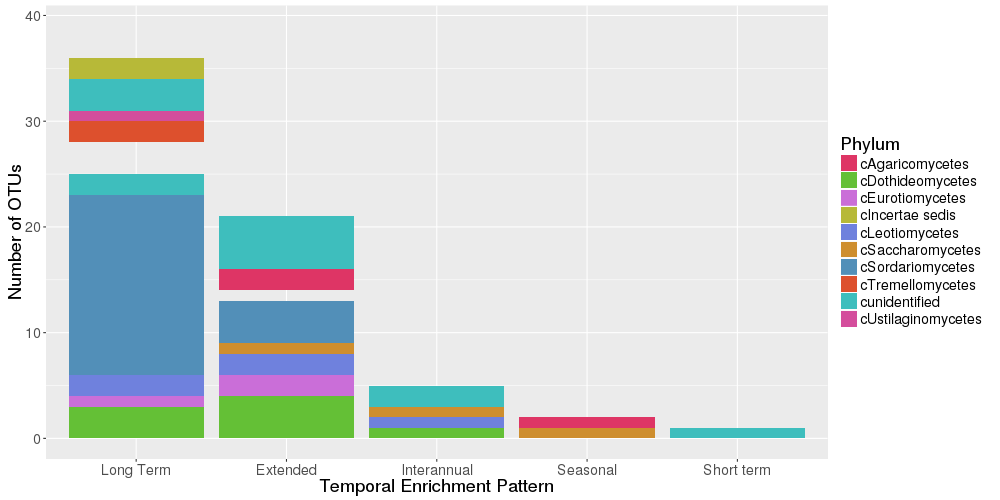

In [56]:
%%R -w 1000 -h 500


Mult_TS_sum_type$type = factor(Mult_TS_sum_type$type, levels = Mult_TS_sum_type$type[order(-Mult_TS_sum_type$counts)])

p = ggplot(data = Mult_TS_sum_type, aes(type, counts, fill = Rank3)) + geom_bar(stat='identity') +
        theme(text = element_text(size=18), axis.text.x = element_text(angle=0, vjust=1))  + 
        xlab('Temporal Enrichment Pattern') + ylab('Number of OTUs') + scale_fill_manual(values = cols, name = 'Phylum')

p

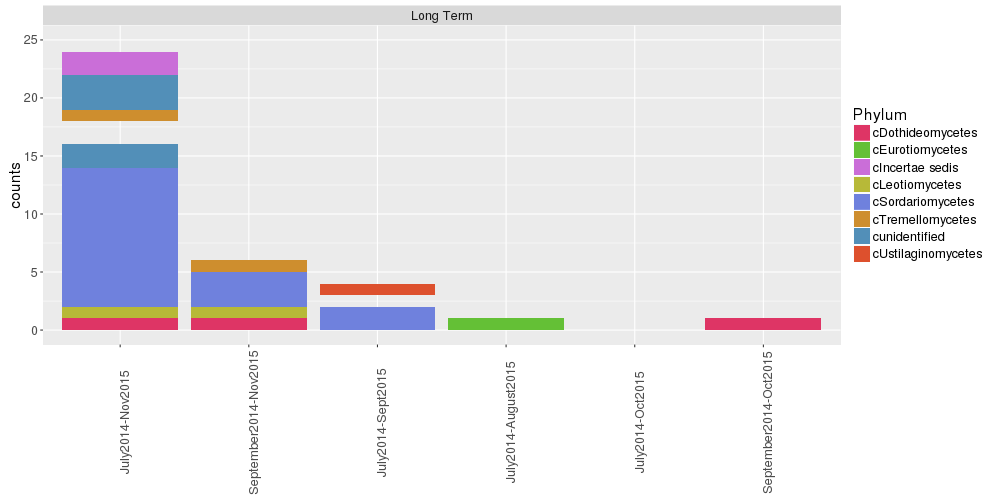

In [57]:
%%R -w 1000 -h 500

Longterm = filter(Mult_TS_sum_type, type == 'Long Term')%>% group_by(ISIE, type, Rank2, Rank3) %>%
    summarise(counts = sum(counts)) 
Longterm$ISIE = factor(Longterm$ISIE, levels = Longterm$ISIE[order(-Longterm$counts)])

p = ggplot(data = Longterm, aes(ISIE, counts, fill = Rank3)) + geom_bar(stat='identity') +
        theme(text = element_text(size=16), axis.text.x = element_text(angle=90, vjust=1)) + facet_wrap(~type) +
        scale_fill_manual(values = cols, name = "Phylum")  + xlab(NULL)

p

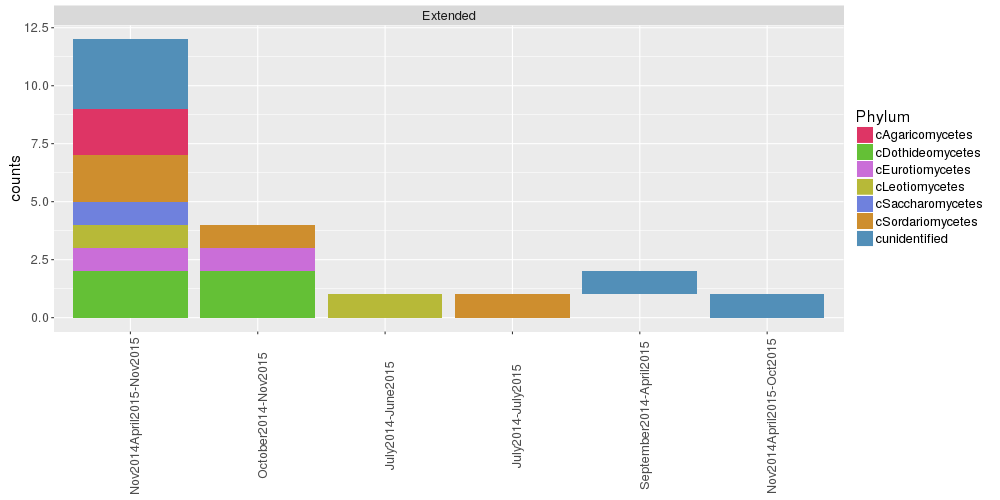

In [58]:
%%R -w 1000 -h 500

Mult_TS_sum_type$ISIE = factor(Mult_TS_sum_type$ISIE, levels = Mult_TS_sum_type$ISIE[order(-Mult_TS_sum_type$counts)])

Longterm = filter(Mult_TS_sum_type, type == 'Extended')  %>% group_by(ISIE, type, Rank2, Rank3) %>%
    summarise(counts = sum(counts)) 
Longterm$ISIE = factor(Longterm$ISIE, levels = Longterm$ISIE[order(-Longterm$counts)])

p = ggplot(data = Longterm, aes(ISIE, counts, fill = Rank3)) + geom_bar(stat='identity') +
        theme(text = element_text(size=16), axis.text.x = element_text(angle=90, vjust=1)) + facet_wrap(~type)+
        scale_fill_manual(values = cols, name = "Phylum")   + xlab(NULL)


p

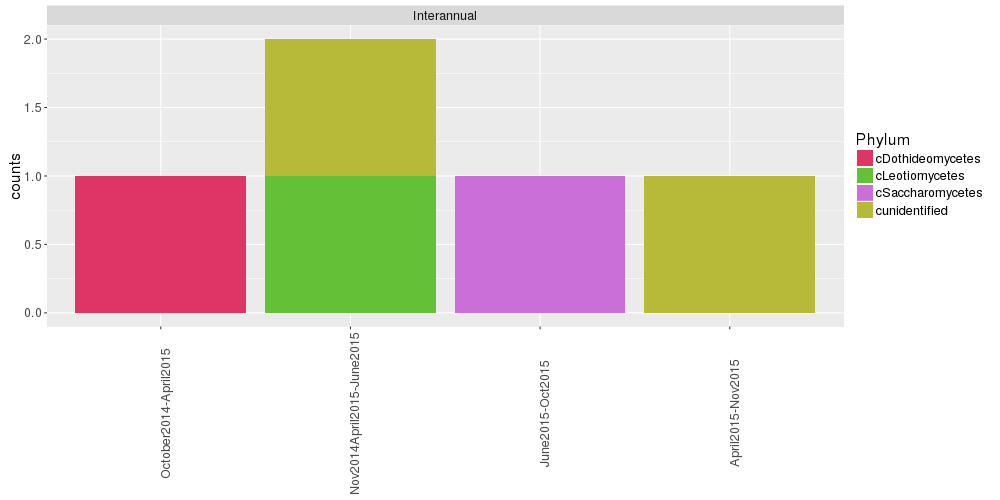

In [59]:
%%R -w 1000 -h 500


Longterm = filter(Mult_TS_sum_type, type == 'Interannual') %>% group_by(ISIE, type, Rank2, Rank3) %>%
    summarise(counts = sum(counts)) 
Longterm$ISIE = factor(Longterm$ISIE, levels = Longterm$ISIE[order(-Longterm$counts)])

p = ggplot(data = Longterm, aes(ISIE, counts, fill = Rank3)) + geom_bar(stat='identity') +
        theme(text = element_text(size=16), axis.text.x = element_text(angle=90, vjust=1)) + facet_wrap(~type)+
        scale_fill_manual(values = cols, name = "Phylum") + xlab(NULL)


p

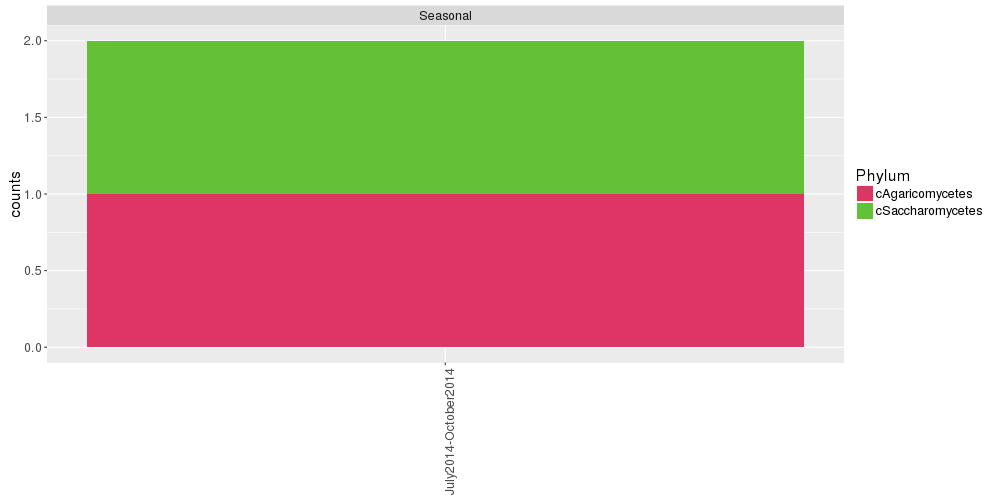

In [60]:
%%R -w 1000 -h 500


Longterm = filter(Mult_TS_sum_type, type == 'Seasonal') %>% group_by(ISIE, type, Rank3) %>%
    summarise(counts = sum(counts)) 
Longterm$ISIE = factor(Longterm$ISIE, levels = Longterm$ISIE[order(-Longterm$counts)])

p = ggplot(data = Longterm, aes(ISIE, counts, fill = Rank3)) + geom_bar(stat='identity') +
        theme(text = element_text(size=16), axis.text.x = element_text(angle=90, vjust=1)) + facet_wrap(~type)+
        scale_fill_manual(values = cols, name = "Phylum") + xlab(NULL)


p

In [74]:
%%R
sessionInfo()

R version 3.2.4 Revised (2016-03-16 r70336)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu precise (12.04.5 LTS)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] doParallel_1.0.10     iterators_1.0.8       metagenomeSeq_1.11.10
 [4] RColorBrewer_1.1-2    glmnet_2.0-3          foreach_1.4.3        
 [7] Matrix_1.2-4          limma_3.22.7          Biobase_2.30.0       
[10] BiocGenerics_0.16.1   biom_0.3.12           scales_0.4.0         
[13] dplyr_0.4.3           plyr_1.8.3            tidyr_0.4.1          
[16] p